<a href="https://colab.research.google.com/github/taavip/MAPlaneeringud/blob/main/plan_analyys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 3s (884 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%

In [2]:
pip install owslib

     |████████████████████████████████| 216 kB 4.0 MB/s 


In [22]:
import pandas as pd
import numpy as np
import re
import sklearn
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://gsavalik.envir.ee/geoserver/planeeringud/ows?service=WFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layers = list(wfs.contents)
layer = layers[3]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [4]:
layers

['planeeringud:detail_plan_juurdep',
 'planeeringud:detail_plan_sund',
 'planeeringud:detail_plan_avalik',
 'planeeringud:detail_plan_ala',
 'planeeringud:detail_plan_haljastus',
 'planeeringud:detail_plan_hoonestus',
 'planeeringud:detail_plan_kktingimus',
 'planeeringud:detail_plan_krunt',
 'planeeringud:detail_plan_kuja',
 'planeeringud:detail_plan_maapar',
 'planeeringud:detail_plan_rajatis',
 'planeeringud:detail_plan_servituut',
 'planeeringud:detail_plan_transp',
 'planeeringud:detail_plan_tehno',
 'planeeringud:detail_plan_tingimus',
 'planeeringud:detail_plan_valveplaan',
 'planeeringud:detail_plan_valveplaan_osa',
 'planeeringud:ehak_tiheasustus',
 'planeeringud:rb_planeeringutrass',
 'planeeringud:yld_plan_ala',
 'planeeringud:yld_plan_juurdep',
 'planeeringud:detail_plan_koko',
 'planeeringud:yld_plan_jaade',
 'planeeringud:yld_plan_kktingimus',
 'planeeringud:yld_plan_maakas',
 'planeeringud:yld_plan_vaartmiljoo',
 'planeeringud:yld_plan_ala_osa',
 'planeeringud:maaamet__r

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd2e23e550>,
      dtype=object)

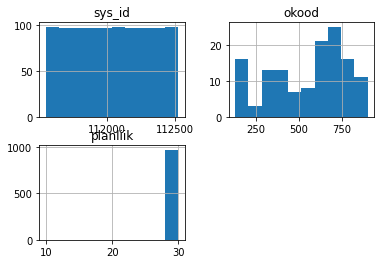

In [5]:
data.hist()


In [6]:
data["vastuvkp"] = data["vastuvkp"].astype("datetime64")

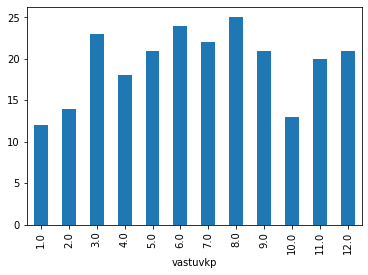

In [7]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.month).count().plot(kind="bar")

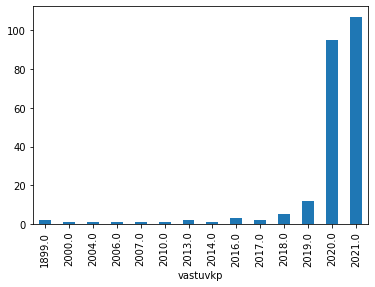

In [8]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.year).count().plot(kind="bar")

In [9]:
data

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry
0,detail_plan_ala.0,111552,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6..."
1,detail_plan_ala.1,111553,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6..."
2,detail_plan_ala.2,111554,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6..."
3,detail_plan_ala.3,111555,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6..."
4,detail_plan_ala.4,111556,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,detail_plan_ala.968,112520,103434,DP_plan_ala,22,NaN,Kõrtsi maaüksuse ja lähiala detailplaneering,30,Detailplaneering,jagada Aegviidu alevi Kõrtsi kinnistu üheksaks...,10,Planeering on kehtiv,2020-09-29,2021-08-31,2021-11-16,None,Anija Vallavalitsus (amphora.ee),None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-04,"POLYGON ((591703.590 6572728.290, 591789.320 6..."
969,detail_plan_ala.969,112521,99954,DP_plan_ala,1,NaN,Ratsakooli detailplaneering Rapla vald...,30,Detailplaneering,Detailplaneeringu eesmärk on ratsatalu komplek...,10,Planeering on kehtiv,2021-06-14,2021-11-15,2021-12-20,None,https://atp.amphora.ee/raplavv2017/index.aspx?...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-04,"POLYGON ((545034.510 6538427.520, 545090.010 6..."
970,detail_plan_ala.970,112522,103573,DP_plan_ala,2,NaN,Kingutamme kinnistu detailplaneering\n,30,Detailplaneering,"Ehitusõiguse, tehnovarustuse, ligipääsude ja h...",10,Planeering on kehtiv,2021-06-16,2021-11-03,2021-12-16,None,https://www.torivald.ee/rutavere-kula-kingutam...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja di

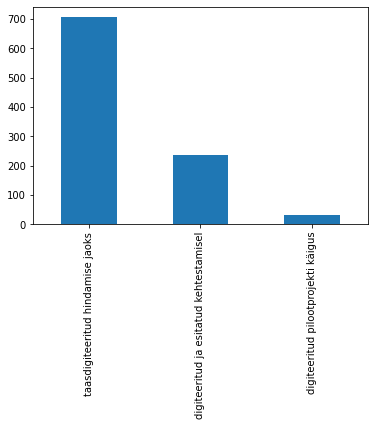

In [10]:
data["plan_kihid"].value_counts()[:10].plot(kind='bar')

In [11]:
#pd.unique(data["vastuvkp"])

array(['2020-09-08T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2020-05-28T00:00:00.000000000', '2021-02-22T00:00:00.000000000',
       '2021-02-26T00:00:00.000000000', '2021-03-24T00:00:00.000000000',
                                 'NaT', '2021-03-09T00:00:00.000000000',
       '2021-05-20T00:00:00.000000000', '2020-08-26T00:00:00.000000000',
       '2020-02-25T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-08-03T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-04-13T00:00:00.000000000',
       '2020-11-25T00:00:00.000000000', '2017-08-09T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2019-10-23T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2016-06-22T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2020-05-27T00:00:00.000000000',
       '2021-05-19T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2020-10-10T00:00:00.000000000', '2021-05-04

# Krunt

In [12]:
layer = layers[7]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
krunt = gpd.read_file(q)

In [13]:
krunt

,id,sys_id,planid,objectid,dp_kiht,oid,okood,otstarve,tingimus,pind,tahis,nimetus,parkimis_arv,allikas,stamp_upd,geometry
0,detail_plan_krunt.0,615693,1182,2,DP_krunt,1,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524122.900 6561694.600, 524188.250 6..."
1,detail_plan_krunt.1,615694,1182,1,DP_krunt,2,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524112.940 6561816.240, 524188.250 6..."
2,detail_plan_krunt.2,615695,1180,3,DP_krunt,1,725.0,Elamumaa,None,2629.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521111.910 6564343.720, 521135.100 6..."
3,detail_plan_krunt.3,615696,1180,12,DP_krunt,5,725.0,Elamumaa,None,1142.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((520995.350 6564304.020, 521016.370 6..."
4,detail_plan_krunt.4,615697,1180,üldmaa,DP_krunt,16,725.0,Üldkasutatav maa,None,10187.0,Ü;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521016.840 6564426.160, 521063.110 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,detail_plan_krunt.4123,619816,93593,4,DP_krunt,10,890.0,Tee ja tänava maa,None,4211.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550269.825 6..."
4124,detail_plan_krunt.4124,619817,93593,5,DP_krunt,9,890.0,Tee ja tänava maa,None,3408.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550148.620 6595938.490, 550159.950 6..."
4125,detail_plan_krunt.4125,619818,93593,2,DP_krunt,6,890.0,Looduslik maa,None,3261.0,HL,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550273.370 6..."
4126,detail_plan_krunt.4126,619819,90412,2,DP_krunt,4,NaN,Maatulundusmaa,None,39176.0,M;,Pos2,None,MA sisestatud,2021-11-17,"POLYGON ((396201.833 6486848.786, 396335.080 6..."


In [14]:
soid=0
df = pd.DataFrame()

for i in krunt.index.values.tolist():
  #print(krunt.iloc[i])
  if (krunt.iloc[i].otstarve is not None):
    so_arv = len(krunt.iloc[i].otstarve.split(";"))
  else:
    so_arv = 1
  
  for j in range(so_arv):
    df.at[soid, 'index'] = i
    df.at[soid, 'oid'] = int(krunt.iloc[i].oid)
    df.at[soid, 'index'] = krunt.iloc[i].planid
    df.at[soid, 'algne_otstarve'] = krunt.iloc[i].otstarve
    df.at[soid, 'algne_tahis'] = krunt.iloc[i].tahis
    df.at[soid, 'so_arv'] = so_arv
    if (krunt.iloc[i].otstarve is not None):
      s = krunt.iloc[i].otstarve.split(";")[j]
      df.at[soid, 'otstarve'] = s
      df.at[soid, 'numbers'] = sum(c.isdigit() for c in s)
      df.at[soid, 'letters'] = sum(c.isalpha() for c in s)
      df.at[soid, 'spaces']  = sum(c.isspace() for c in s)
      df.at[soid, 'upper']  = sum(c.isupper() for c in s)
      df.at[soid, 'others']  = len(s) - df.iloc[soid].numbers - df.iloc[soid].letters - df.iloc[soid].spaces
    if (krunt.iloc[i].tahis is not None):
      #if (krunt.iloc[i].tahis.split(";")[j] is not None):
      if so_arv>len(krunt.iloc[i].tahis.split(";")) and j+1>len(krunt.iloc[i].tahis.split(";")):
        df.at[soid, 'tahis'] = np.nan
      else:
        df.at[soid, 'tahis'] = krunt.iloc[i].tahis.split(";")[j]
    soid=soid+1


df["index"] = df["index"].astype(float).astype(int)
df["oid"] = df["oid"].astype(float).astype(int)
df["so_arv"] = df["so_arv"].astype(float).astype(int)
df["numbers"] = df["numbers"].fillna(0).astype(float).astype(int)
df["letters"] = df["letters"].fillna(0).astype(float).astype(int)
df["spaces"] = df["spaces"].fillna(0).astype(float).astype(int)
df["upper"] = df["upper"].fillna(0).astype(float).astype(int)
df["others"] = df["others"].fillna(0).astype(float).astype(int)
df


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
4986,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
4987,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
4988,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL
4989,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M


In [38]:
def strip_element1(my_list):
  return list(filter(lambda x: x != "", [x.replace('=','').replace('<','').replace('>','').replace('%','') for x in my_list]))

In [39]:
def strip_element(my_list):
  return list(filter(lambda x: x != "", [re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','') for x in my_list]))

In [40]:
df["otstarve_l"] = df["otstarve"].str.split(r'(\d+)')
#df["otstarve_l"] = df["otstarve_l"].str.strip()
for row in df.loc[df.otstarve_l.isnull(), 'otstarve_l'].index:
    df.at[row, 'otstarve_l'] = []

df['otstarve_l']=df['otstarve_l'].apply(strip_element1)
df["otstarve_ll"] = df["otstarve_l"].str.len()
df["otstarve_ll"] = df["otstarve_ll"].fillna(0).astype(float).astype(int)
df

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E,[Elamumaa],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
4987,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
4988,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL,[Looduslik maa ],1
4989,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M,[Maatulundusmaa ],1


In [41]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])



In [44]:
import string 
import re
count_so=to_1D(df["otstarve_l"]).value_counts().to_frame('count')
count_so['len']=count_so.index.str.len()
count_so['num']=count_so.index.str.isnumeric()
count_so['comma']=count_so.index.str.count(",")
count_so['slash']=count_so.index.str.count("/")
count_so['percent']=count_so.index.str.count("%")
count_so['braket']= count_so.index.str.count('\(') + count_so.index.str.count('\)')
count_so['punktu']= count_so.index.str.count(f'[{re.escape(string.punctuation)}]')
count_so['maa']= count_so.index.str.count('maa')
count_so['maa-ala']= count_so.index.str.count('maa-ala')
count_so['ots_l']=count_so.index.str.replace('sat-siooni','satsiooni').str.replace(' maa-ala','').str.replace('y','ü').str.replace('/',';').str.replace('%','').str.replace('\n','').str.replace('=','').str.replace('≥','').str.replace('≤','').str.replace('<','').str.replace('>','').str.replace('ja ', ';').str.replace(',', ';').str.replace('(', ';').str.replace(')', ';').str.replace('või', ';').str.replace('vähemalt', ';').str.replace('kuni', ';').str.strip(' ').str.lower().str.replace('-',';')
count_so['ots_l']=count_so['ots_l'].str.split(';')
count_so['ots_l']=count_so['ots_l'].apply(strip_element)
count_so

,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,ots_l
,1786,1,False,0,0,0,0,0,0,0,[]
100,1136,3,True,0,0,0,0,0,0,0,[100]
Ä,674,2,False,0,0,0,0,0,0,0,[ä]
EK,479,3,False,0,0,0,0,0,0,0,[ek]
Elamumaa,378,9,False,0,0,0,0,0,1,0,[elamu]
...,...,...,...,...,...,...,...,...,...,...,...
91,1,2,True,0,0,0,0,0,0,0,[91]
sideehitise maa,1,16,False,0,0,0,0,0,1,0,[sideehitise ]
majutushoone maa (ÄM),1,23,False,0,0,0,2,2,1,0,"[majutushoone , äm]"
"Tootmismaa, maatulundusmaa",1,26,False,1,0,0,0,1,3,0,"[tootmis, maatulundus]"


In [57]:

test=to_1D(count_so["ots_l"]).value_counts().to_frame('count')
test.reset_index(inplace=True)



test.loc[test['index'].str.len()<=3, 'type'] = 'ly'
test.loc[test['index'].str.len()>3, 'type'] = 'so'
test.loc[test['index'].str.isnumeric(), 'type'] = 'num'
test

,index,count,type
0,kaubandus,26,so
1,äri,18,ly
2,toitlustus,18,so
3,teenindushoone,16,so
4,ek,14,ly
...,...,...,...
211,ühiselamu,1,so
212,88,1,num
213,ph,1,ly
214,ühiskondliku ehitise,1,so


In [ ]:
!pip install string-grouper

In [63]:
from string_grouper import match_strings, match_most_similar, group_similar_strings, StringGrouper
# Add the grouped strings
test['dd']=group_similar_strings(test['index'],ignore_index=True)
# Show items with most duplicates
test.groupby('dd').count()

,index,count,type
dd,,,
...,1,1,1
0,1,1,1
10,1,1,1
100,1,1,1
1000,1,1,1
...,...,...,...
üldkasutatav,1,1,1
üldkasutatav haljasala,1,1,1
üm,1,1,1
